# Von Bertalanffy Growth Model
The **von Bertalanffy Growth Function (VBGF)** is a cornerstone of fisheries biology and ecology, used to model the mean length or weight of organisms over time. Unlike simple exponential models, it accounts for the physiological trade-off between anabolic (building) and catabolic (breaking down) processes. As the fish $L$ gets closer to $A$, the term $(A - L)$ gets smaller, so the growth rate $dL/dt$ slows down. This explains why juvenile fish grow faster than old ones. The differential form of the von Bertalanffy equation for length ($L$) over time ($t$) is:
$$\frac{dL}{dt} = k(L_{\infty} - L)$$
Where the integrated form (the solution) is:
$$L(t) = L_{\infty}(1 - e^{-k(t - t_0)})$$

| **Term**     | **Biological Meaning**                                                                                                                  | **Units**                     |
| ------------ | --------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------- |
| $L$          | Current length of the organism.                                                                                                         | $cm$ or $mm$                  |
| $t$          | Age of the organism.                                                                                                                    | $years$ or $days$             |
| $L_{\infty}$ | **Asymptotic Length**: The theoretical maximum length the animal would reach if it lived indefinitely.                                  | $cm$ or $mm$                  |
| $k$          | **Brody Growth Coefficient**: Measures how quickly the organism approaches $L_{\infty}$. It is a rate, not a growth speed.              | $time^{-1}$ (e.g., $yr^{-1}$) |
| $t_0$        | **Theoretical Age at Zero Length**: A modeling adjustment factor representing the age at which the organism would have had length zero. | $years$ or $days$             |
- **Metabolic Scaling:** The model assumes that the rate of change in an organism's weight ($W$) is the difference between anabolism (proportional to surface area, $W^{2/3}$) and catabolism (proportional to volume/mass, $W^1$).
- **Constant Environment:** Parameters $k$ and $L_{\infty}$ are assumed constant over the lifespan (no seasonal growth fluctuations).
- **Determinate Growth:** The organism's growth rate slows as it approaches a maximum size limit ($L_{\infty}$).

The model is a non-homogeneous first-order linear ODE. We start with the first-order linear differential equation:
$$\frac{dL}{dt} = kL_{\infty} - kL$$
Group the $L$ terms on the left and $t$ terms on the right:
$$\frac{dL}{L_{\infty} - L} = k \, dt$$
Integrate both sides:
$$\int \frac{1}{L_{\infty} - L} \, dL = \int k \, dt$$
Use $u$-substitution for the left side: let $u = L_{\infty} - L$, then $du = -dL$.
$$-\ln(L_{\infty} - L) = kt + C$$ Multiply by $-1$ and exponentiate:
$$\ln(L_{\infty} - L) = -kt - C$$
$$L_{\infty} - L = e^{-kt - C}$$
$$L_{\infty} - L = Ae^{-kt}$$
(where $A = e^{-C}$ is a constant of integration). We define $t_0$ such that at $t = t_0$, $L = 0$:
$$0 = L_{\infty} - Ae^{-kt_0}$$
$$Ae^{-kt_0} = L_{\infty}$$
$$A = L_{\infty}e^{kt_0}$$
Substitute $A$ back into the equation:
$$L = L_{\infty} - (L_{\infty}e^{kt_0})e^{-kt}$$
$$L = L_{\infty} - L_{\infty}e^{-k(t-t_0)}$$
$$L(t) = L_{\infty}(1 - e^{-k(t-t_0)})$$
To analyze the stability, we examine the fixed points where $\frac{dL}{dt} = 0$.
$$k(L_{\infty} - L) = 0 \implies L^* = L_{\infty}$$
There is one equilibrium point at $L = L_{\infty}$. To determine stability, we find the derivative with respect to $L$ (the **Jacobian** in 1D):
$$f'(L) = \frac{d}{dL}(kL_{\infty} - kL) = -k$$
In a 1D system, the eigenvalue $\lambda$ is simply $f'(L^*)$.
$$\lambda = -k$$
Since $k$ (the growth coefficient) is always a positive biological constant, $\lambda$ is strictly negative ($\lambda < 0$). The equilibrium point $L^* = L_{\infty}$ is a **Stable Node (Sink)**. Regardless of the initial length (as long as $L < L_{\infty}$), the system will monotonically approach $L_{\infty}$ over time. The **Trace** of this 1D "matrix" is $-k$ and the **Determinant** is not applicable in 1D, but the negative eigenvalue confirms that any perturbations from the asymptotic length will decay over time.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

plt.style.use('seaborn-v0_8-whitegrid')

In [4]:
def von_bertalanffy(L, t, k, L_inf):
    """
    dL/dt = k * (L_inf - L)
    """
    return k * (L_inf - L)

### Time Series Simulation

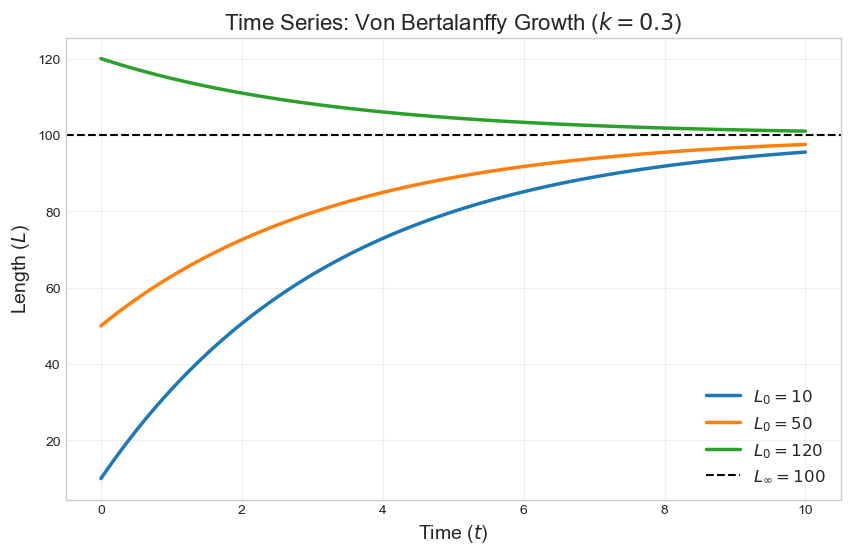

In [5]:
t = np.linspace(0, 10, 100)
L_inf = 100                         # Maximum length (cm)
k = 0.3                             # Growth coefficient
initial_conditions = [10, 50, 120]  # Starting sizes: Small, Medium, Oversized

fig, ax = plt.subplots(figsize=(10, 6))

for L0 in initial_conditions:
    L_t = odeint(von_bertalanffy, L0, t, args=(k, L_inf))
    label = f'$L_0={L0}$'
    ax.plot(t, L_t, linewidth=2.5, label=label)

ax.axhline(L_inf, color='black', linestyle='--', label=f'$L_\infty={L_inf}$')
ax.set_title(f'Time Series: Von Bertalanffy Growth ($k={k}$)', fontsize=16)
ax.set_xlabel('Time ($t$)', fontsize=14)
ax.set_ylabel('Length ($L$)', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

plt.show()

### Phase Diagram

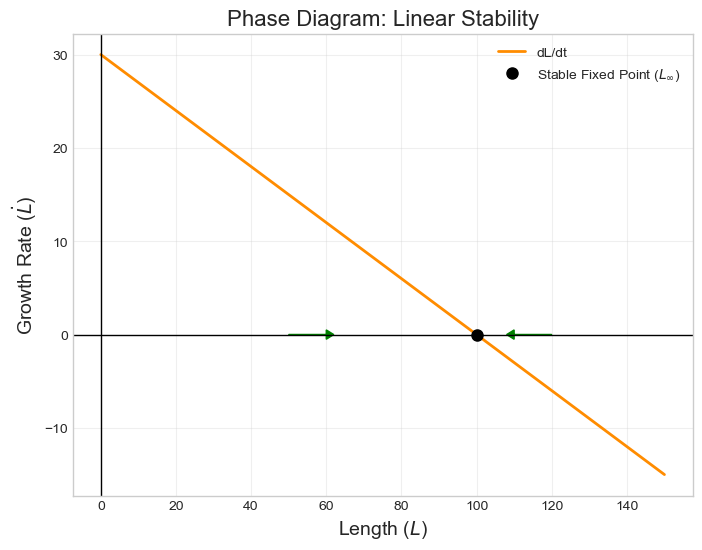

In [6]:
L_phase = np.linspace(0, 150, 100)
k_phase = 0.3
L_inf_phase = 100

dL_dt = von_bertalanffy(L_phase, 0, k_phase, L_inf_phase)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(L_phase, dL_dt, color='darkorange', linewidth=2, label='dL/dt')

ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)

ax.plot(L_inf_phase, 0, 'ko', markersize=8, label='Stable Fixed Point ($L_\infty$)')

ax.arrow(L_inf_phase/2, 0, 10, 0, head_width=1, head_length=2, fc='green', ec='green')
ax.arrow(L_inf_phase + 20, 0, -10, 0, head_width=1, head_length=2, fc='green', ec='green')

ax.set_title('Phase Diagram: Linear Stability', fontsize=16)
ax.set_xlabel('Length ($L$)', fontsize=14)
ax.set_ylabel('Growth Rate ($\\dot{L}$)', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)

plt.show()

### Vector Field

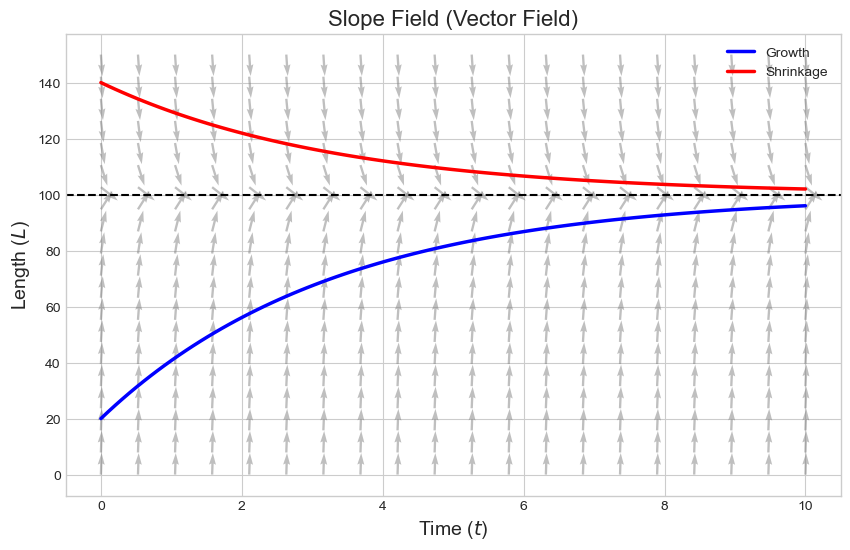

In [7]:
t_mesh = np.linspace(0, 10, 20)
L_mesh = np.linspace(0, 150, 20)
T, L_grid = np.meshgrid(t_mesh, L_mesh)

dL = von_bertalanffy(L_grid, 0, k=0.3, L_inf=100)
dT = np.ones(dL.shape)

Norm = np.sqrt(dT**2 + dL**2)
dT_norm = dT / Norm
dL_norm = dL / Norm

fig, ax = plt.subplots(figsize=(10, 6))

ax.quiver(T, L_grid, dT_norm, dL_norm, color='gray', alpha=0.5)

t_traj = np.linspace(0, 10, 100)
L_traj_1 = odeint(von_bertalanffy, y0=20, t=t_traj, args=(0.3, 100))
L_traj_2 = odeint(von_bertalanffy, y0=140, t=t_traj, args=(0.3, 100))

ax.plot(t_traj, L_traj_1, 'b-', linewidth=2.5, label='Growth')
ax.plot(t_traj, L_traj_2, 'r-', linewidth=2.5, label='Shrinkage')

ax.axhline(100, color='k', linestyle='--', linewidth=1.5)

ax.set_title('Slope Field (Vector Field)', fontsize=16)
ax.set_xlabel('Time ($t$)', fontsize=14)
ax.set_ylabel('Length ($L$)', fontsize=14)
ax.legend()

plt.show()